In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np 
data= pd.read_csv('../midterm/heart_disease.csv')
from sklearn.model_selection import *
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from numpy.random import seed
import matplotlib.pyplot as plt

import seaborn as sns


In [3]:
# data cleaning based on visualization 

data = pd.read_csv("heart_disease.csv")
physical_range_group2 = np.arange(1,15)
physical_range_group3 = np.arange(15,30)
for i in physical_range_group2:
    data['PhysHlth'] = data['PhysHlth'].replace([i],1)
for i in physical_range_group3:
    data['PhysHlth'] = data['PhysHlth'].replace([i],2)
data['PhysHlth'] = data['PhysHlth'].replace([30],3)
BMI_group_store = []
k = 12
for i in range(1,4):
    BMI_group_store.append(np.arange(k+i*7,k+i*7+7))
for i in range(1,4):
    data['BMI'] = data['BMI'].replace(BMI_group_store[i-1],i-1)
data['BMI'] = data['BMI'].replace(np.arange(12,19),0)
data['BMI'] = data['BMI'].replace(np.arange(40,99),3)

y = data['HeartDiseaseorAttack']
x= data.drop(['HeartDiseaseorAttack',"Fruits","Veggies","HvyAlcoholConsump",'NoDocbcCost','AnyHealthcare'], axis=1)
x
# randomly sample test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)





,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,5.0,18.0,2.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,30.0,3.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
# fitting with logistic regression based model
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

from sklearn.metrics import accuracy_score

# call model
lr=LogisticRegression(solver='newton-cg', max_iter=1000000,random_state=10)


outcome=cross_validate(lr,x_train,y_train,scoring='f1',cv=10)
f1_trainCV=outcome['test_score'].mean()
f1_trainCV


# fit model
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
#recall=outcome['test_recall'].mean()
#recall

D:\anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\anaconda\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


0.20534944704129474

LogisticRegression(max_iter=1000000, random_state=10, solver='newton-cg')

0.19710638297872343
0.9070285398927783


In [4]:

#sorted(sklearn.metrics.SCORERS.keys())


In [5]:
# logistic regression with gridsearch weight
from sklearn.model_selection import GridSearchCV
weights= np.linspace(0,0.99,20) # take 20 numbers between 0 and 0.99 for gridsearch
# weight is any number between 0 and 1, weight of 1= x, weight of 0 = 1-x 
grid={'class_weight':[{0:x, 1:1.0-x} for x in weights]}
lr= LogisticRegression(solver='newton-cg',max_iter=1000000,random_state=10)

gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1',
                          ).fit(x_train, y_train)


,score,weight
0,0.171725,1.000000
1,0.321617,0.947895
2,0.383652,0.895789
3,0.411864,0.843684
4,0.414177,0.791579
5,0.402268,0.739474
6,0.369610,0.687368
7,0.330997,0.635263
8,0.284907,0.583158
9,0.235002,0.531053


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


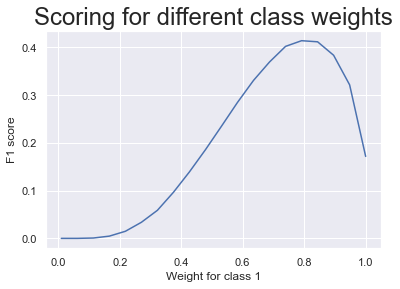

In [6]:
# plot weight versus cross validation f1 score
from sklearn.model_selection import GridSearchCV
weight= pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'],'weight':  1-weights})
weight
sns.set_theme()
_=sns.lineplot(weight['weight'], weight['score'])
_=plt.xlabel('Weight for class 1')
_=plt.ylabel('F1 score')

_=plt.title('Scoring for different class weights', fontsize=24)
plt.show()



In [7]:
# print out gridsearch result

print("tuned hpyerparameters :(best parameters) ",gridsearch.best_params_)
print("Best F1 score:",gridsearch.best_score_)

tuned hpyerparameters :(best parameters)  {'class_weight': {0: 0.20842105263157895, 1: 0.791578947368421}}
Best F1 score: 0.41417666721282326


In [8]:
# refit the model with the tuned model and find f1 score. 

weighted_lr=LogisticRegression(solver='newton-cg', max_iter=1000000,random_state=10, class_weight =gridsearch.best_params_\
                                 ['class_weight'])
weighted_lr.fit(x_train,y_train)
weighted_y_pred = weighted_lr.predict(x_test)

print( f1_score(y_test,weighted_y_pred))# f1 score improves a lot
print( accuracy_score(y_test,weighted_y_pred)) # accuracy score only drop slightly

LogisticRegression(class_weight={0: 0.20842105263157895, 1: 0.791578947368421},
                   max_iter=1000000, random_state=10, solver='newton-cg')

0.41825158491825154
0.8625433617155471


,score,weight
0,1.000000,1.000000
1,0.899696,0.947895
2,0.763981,0.895789
3,0.632672,0.843684
4,0.513272,0.791579
5,0.417060,0.739474
6,0.328402,0.687368
7,0.259154,0.635263
8,0.200923,0.583158
9,0.151506,0.531053


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


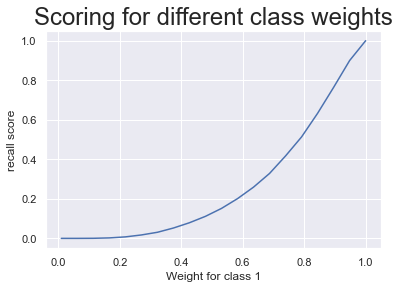

In [9]:
# repeat the previous steps for recall 
from sklearn.model_selection import GridSearchCV
weights= np.linspace(0,0.99,20)
grid={'class_weight':[{0:x, 1:1.0-x} for x in weights]}
lr= LogisticRegression(solver='newton-cg',max_iter=1000000,random_state=10)

gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='recall',
                          ).fit(x_train, y_train)


from sklearn.model_selection import GridSearchCV
weight= pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'],'weight':  1-weights})
weight
sns.set_theme()
_=sns.lineplot(weight['weight'], weight['score'])
_=plt.xlabel('Weight for class 1')
_=plt.ylabel('recall score')

_=plt.title('Scoring for different class weights', fontsize=24)
plt.show()


